In [2]:
import pandas as pd
train_df = pd.read_csv('data/train_dataset.csv')
test_df = pd.read_csv('data/test_dataset.csv')

In [4]:
print(train_df.head())
print(test_df.head())

                                                text emotion situation
0  일은 왜 해도 해도 끝이 없을까? 화가 난다. 그냥 내가 해결하는 게 나아. 남들한...     E18       S06
1  이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나....     E18       S06
2  회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...     E18       S06
3  직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...     E18       S06
4  얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나. 상사인 나에게 ...     E18       S06
                                                text emotion situation
0  이번 프로젝트에서 발표를 하는데 내가 실수하는 바람에 우리 팀이 감점을 받았어. 너...     E31       S06
1  회사에서 중요한 프로젝트를 혼자 하게 됐는데 솔직히 두렵고 무서워. 나에게 너무 크...     E31       S06
2  상사가 너무 무섭게 생겨서 친해지는 게 너무 두려워. 무섭게 생겼는데도 업무를 보려...     E31       S06
3  이번에 힘들게 들어간 첫 직장이거든. 첫 직장이라서 그런지 너무 긴장된다. 첫 직장...     E31       S06
4  직장에서 동료들이랑 관계가 안 좋아질까 봐 걱정돼. 내가 낯가림이 심해서 친해질 수...     E31       S06


In [6]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51628 entries, 0 to 51627
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       51628 non-null  object
 1   emotion    51628 non-null  object
 2   situation  51628 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6640 entries, 0 to 6639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       6640 non-null   object
 1   emotion    6640 non-null   object
 2   situation  6640 non-null   object
dtypes: object(3)
memory usage: 155.8+ KB
None


In [10]:
# 감정 분포 출력
emotion_counts = train_df['emotion'].value_counts()
print("Emotion counts:\n", emotion_counts)

# 상황 분포 출력
situation_counts = train_df['situation'].value_counts()
print("Situation counts:\n", situation_counts)


Emotion counts:
 emotion
E37    1229
E13    1054
E24    1002
E27     993
E31     991
E47     984
E18     975
E32     971
E19     969
E20     958
E10     958
E48     953
E22     950
E45     949
E40     937
E11     926
E58     918
E42     911
E44     910
E23     906
E34     901
E43     901
E51     900
E39     899
E56     897
E41     896
E28     896
E30     893
E29     884
E55     883
E17     882
E12     875
E16     873
E52     872
E21     870
E59     870
E38     869
E53     865
E33     864
E49     861
E36     860
E50     859
E54     859
E15     845
E35     842
E46     840
E25     838
E57     833
E26     828
E14     803
E60     660
E64     655
E67     639
E68     634
E61     631
E62     609
E63     597
E69     570
E66     568
E65     563
Name: count, dtype: int64
Situation counts:
 situation
S04    10926
S06     5223
S13     4962
S11     4222
S01     4207
S05     4085
S07     3402
S02     3283
S03     3091
S09     3022
S08     2738
S10     2467
Name: count, dtype: int64


In [12]:
# 가장 적은 감정 클래스 개수 찾기
min_emotion_count = emotion_counts.min()

# 가장 적은 상황 클래스 개수 찾기
min_situation_count = situation_counts.min()

print(f"Minimum emotion count: {min_emotion_count}")
print(f"Minimum situation count: {min_situation_count}")

Minimum emotion count: 563
Minimum situation count: 2467


In [36]:
# 감정별로 데이터를 언더샘플링
under_sampled_emotion_df = train_df.groupby('emotion', group_keys=False).apply(
    lambda x: x.sample(min_emotion_count, random_state=42) if len(x) > min_emotion_count else x
).reset_index(drop=True)

# 상황별로 데이터를 언더샘플링
under_sampled_situation_df = under_sampled_emotion_df.groupby('situation', group_keys=False).apply(
    lambda x: x.sample(min_situation_count, random_state=42) if len(x) > min_situation_count else x
).reset_index(drop=True)

# 감정 클래스와 상황 클래스의 분포 확인
print("Emotion counts after undersampling:")
print(under_sampled_situation_df['emotion'].value_counts())

print("Situation counts after undersampling:")
print(under_sampled_situation_df['situation'].value_counts())



Emotion counts after undersampling:
emotion
E16    477
E22    470
E65    467
E63    464
E36    463
E46    461
E66    460
E30    460
E60    460
E13    458
E33    457
E61    455
E26    455
E49    454
E15    454
E18    453
E55    453
E54    452
E69    452
E56    451
E23    451
E24    451
E40    450
E45    450
E35    450
E51    449
E19    449
E21    448
E10    447
E37    447
E28    447
E62    446
E12    446
E52    446
E57    445
E68    445
E59    444
E38    443
E20    443
E48    443
E14    442
E64    441
E67    441
E39    441
E17    441
E32    440
E31    439
E58    439
E27    437
E53    432
E29    431
E42    429
E34    428
E47    427
E11    426
E25    425
E44    424
E50    424
E41    421
E43    417
Name: count, dtype: int64
Situation counts after undersampling:
situation
S01    2467
S04    2467
S05    2467
S06    2467
S11    2467
S13    2467
S07    2267
S02    2196
S03    2009
S09    2003
S08    1821
S10    1663
Name: count, dtype: int64


C:\Users\kj\AppData\Local\Temp\ipykernel_13460\268686282.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  under_sampled_emotion_df = train_df.groupby('emotion', group_keys=False).apply(
C:\Users\kj\AppData\Local\Temp\ipykernel_13460\268686282.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  under_sampled_situation_df = under_sampled_emotion_df.groupby('situation', group_keys=False).apply(


Emotion counts after undersampling:
emotion
E16    477
E22    470
E65    467
E63    464
E36    463
E46    461
E66    460
E30    460
E60    460
E13    458
E33    457
E61    455
E26    455
E49    454
E15    454
E18    453
E55    453
E54    452
E69    452
E56    451
E23    451
E24    451
E40    450
E45    450
E35    450
E51    449
E19    449
E21    448
E10    447
E37    447
E28    447
E62    446
E12    446
E52    446
E57    445
E68    445
E59    444
E38    443
E20    443
E48    443
E14    442
E64    441
E67    441
E39    441
E17    441
E32    440
E31    439
E58    439
E27    437
E53    432
E29    431
E42    429
E34    428
E47    427
E11    426
E25    425
E44    424
E50    424
E41    421
E43    417
Name: count, dtype: int64
Situation counts after undersampling:
situation
S01    2467
S04    2467
S05    2467
S06    2467
S11    2467
S13    2467
S07    2267
S02    2196
S03    2009
S09    2003
S08    1821
S10    1663
Name: count, dtype: int64


In [88]:
from sklearn.preprocessing import LabelEncoder

# 감정 라벨 인코딩
emotion_encoder = LabelEncoder()
train_df["emotion"] = emotion_encoder.fit_transform(train_df["emotion"])
test_df["emotion"] = emotion_encoder.transform(test_df["emotion"])

# 상황 라벨 인코딩
situation_encoder = LabelEncoder()
train_df["situation"] = situation_encoder.fit_transform(train_df["situation"])
test_df["situation"] = situation_encoder.transform(test_df["situation"])


In [90]:
train_df.head()

,text,emotion,situation
0,없다 그냥 해결 부담,8,5
1,급여 물가 월급 자꾸 너무 최대한 지출 억제 고정 없다,8,5
2,회사 신입 말투 매일 생각 스트레스 사람 억지로 거리 예의,8,5
3,직장 막내 이유 심부름 많다 정말 분하다 사람 이야기 방해,8,5
4,입사 신입 사원 무시 너무 상사 먼저 인사 매일,8,5


In [92]:
import torch
import torch.nn as nn
from transformers import BertModel, AutoTokenizer

# ✅ 1. KoBERT 커스텀 모델 정의 (감정 + 상황 다중 분류)
class KoBERTMultiOutput(nn.Module):
    def __init__(self, model_name, num_emotions, num_situations):
        super(KoBERTMultiOutput, self).__init__()
        self.bert = BertModel.from_pretrained(model_name)  # KoBERT 기본 모델
        self.dropout = nn.Dropout(0.1)  # 드롭아웃 레이어 추가
        self.emotion_classifier = nn.Linear(self.bert.config.hidden_size, num_emotions)  # 감정 분류기
        self.situation_classifier = nn.Linear(self.bert.config.hidden_size, num_situations)  # 상황 분류기

    def forward(self, input_ids, attention_mask, token_type_ids):
        # Bert 모델을 통해 출력값을 얻음
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        pooled_output = self.dropout(outputs.pooler_output)  # BERT 출력에서 pooling된 벡터에 드롭아웃 적용

        # 감정과 상황을 위한 로짓 분리
        emotion_logits = self.emotion_classifier(pooled_output)
        situation_logits = self.situation_classifier(pooled_output)

        # 두 가지 로짓 반환
        return emotion_logits, situation_logits


In [93]:
from torch.utils.data import DataLoader, TensorDataset
from transformers import AutoTokenizer
import torch
from sklearn.preprocessing import LabelEncoder

# ✅ 1. Tokenizer 초기화
tokenizer = AutoTokenizer.from_pretrained("monologg/kobert",  trust_remote_code=True)  # KoBERT 모델에 맞는 토크나이저 사용

# ✅ 2. train_df에서 텍스트를 토큰화 (훈련 데이터)
train_texts = train_df["text"].tolist()  # 'text' 컬럼에 훈련 데이터가 있다고 가정
train_encodings = tokenizer(train_texts, padding=True, truncation=True, max_length=128, return_tensors="pt")  # 토큰화

# ✅ 3. 라벨 데이터 (감정, 상황)
# 감정과 상황을 숫자 레이블로 변환
emotion_encoder = LabelEncoder()
situation_encoder = LabelEncoder()

emotion_labels = emotion_encoder.fit_transform(train_df['emotion'].values)  # 감정 라벨
situation_labels = situation_encoder.fit_transform(train_df['situation'].values)  # 상황 라벨

# 텐서로 변환
emotion_labels = torch.tensor(emotion_labels)
situation_labels = torch.tensor(situation_labels)

# ✅ 4. TensorDataset 생성 (입력 데이터와 레이블을 묶음)
input_ids = train_encodings['input_ids']
attention_mask = train_encodings['attention_mask']
token_type_ids = train_encodings['token_type_ids'] if 'token_type_ids' in train_encodings else torch.zeros_like(input_ids)

# TensorDataset을 이용해 훈련 데이터셋을 생성
train_dataset = TensorDataset(input_ids, attention_mask, token_type_ids, emotion_labels, situation_labels)

# ✅ 5. DataLoader 생성 (배치 크기 설정)
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)  # 배치 크기 16으로 설정


# ✅ 6. 테스트 데이터셋 생성
test_texts = test_df["text"].tolist()  # 'text' 컬럼에 테스트 데이터가 있다고 가정
test_encodings = tokenizer(test_texts, padding=True, truncation=True, max_length=128, return_tensors="pt")  # 토큰화

# 테스트 데이터 라벨 (감정, 상황)
emotion_labels_test = emotion_encoder.transform(test_df['emotion'].values)  # 감정 라벨
situation_labels_test = situation_encoder.transform(test_df['situation'].values)  # 상황 라벨

# 텐서로 변환
emotion_labels_test = torch.tensor(emotion_labels_test)
situation_labels_test = torch.tensor(situation_labels_test)

# ✅ 7. TensorDataset 생성 (입력 데이터와 테스트 레이블을 묶음)
input_ids_test = test_encodings['input_ids']
attention_mask_test = test_encodings['attention_mask']
token_type_ids_test = test_encodings['token_type_ids'] if 'token_type_ids' in test_encodings else torch.zeros_like(input_ids_test)

# TensorDataset을 이용해 테스트 데이터셋을 생성
test_dataset = TensorDataset(input_ids_test, attention_mask_test, token_type_ids_test, emotion_labels_test, situation_labels_test)

# ✅ 8. DataLoader 생성 (배치 크기 설정)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)  # 배치 크기 16으로 설정


# ✅ 9. 배치 데이터 확인 (선택 사항)
for batch in train_dataloader:
    print(batch)  # 첫 번째 배치 확인
    break  # 첫 번째 배치만 확인

for batch in test_dataloader:
    print(batch)  # 첫 번째 테스트 배치 확인
    break  # 첫 번째 배치만 확인


[tensor([[   2,  806, 5156, 1458, 1632, 1786, 6273, 6003, 7318, 3742,    3,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1],
        [   2, 4627, 4949, 4872,  517, 6189, 7431, 7096, 3273, 2267, 5468, 2734,
         6542,  517, 7095, 5731,    3,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1],
        [   2, 1423, 4627, 4396, 7316, 1437,  950, 4206, 3273, 3756, 3343,    3,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1

In [96]:
import time
import torch
import torch.nn as nn
from tqdm import tqdm
from transformers import AdamW, get_scheduler
import matplotlib.pyplot as plt
import os
from transformers import AutoTokenizer
from datetime import datetime
from sklearn.utils.class_weight import compute_class_weight
import numpy as np


# ✅ 2. 모델 생성 (train_df의 감정, 상황 레이블 수에 맞춰 설정)
num_emotions = len(train_df["emotion"].unique())  # 감정 클래스 개수
num_situations = len(train_df["situation"].unique())  # 상황 클래스 개수
model_name = "monologg/kobert"

model = KoBERTMultiOutput(model_name, num_emotions, num_situations)  # 모델 초기화

# ✅ 3. 디바이스 설정 (GPU 또는 CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())
model.to(device)  # 모델을 설정한 디바이스로 이동

# ✅ 4. 클래스 가중치 계산
emotion_labels = train_df['emotion'].values
situation_labels = train_df['situation'].values

# 감정과 상황에 대한 클래스 가중치 계산
emotion_class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(emotion_labels), y=emotion_labels)
situation_class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(situation_labels), y=situation_labels)

# 가중치를 텐서로 변환
emotion_weights = torch.tensor(emotion_class_weights, dtype=torch.float).to(device)
situation_weights = torch.tensor(situation_class_weights, dtype=torch.float).to(device)

# ✅ 5. 손실 함수 설정 (가중치 적용)
loss_fn = nn.CrossEntropyLoss(weight=emotion_weights)  # 감정 클래스 가중치 적용
situation_loss_fn = nn.CrossEntropyLoss(weight=situation_weights)  # 상황 클래스 가중치 적용

# ✅ 6. 옵티마이저 및 학습률 스케줄러 설정
optimizer = AdamW(model.parameters(), lr=2e-5)  # AdamW 옵티마이저 사용
num_training_steps = len(train_dataloader) * 20  # 학습할 총 스텝 수 
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)  # 학습률 스케줄러 설정

# ✅ 7. 모델 학습
num_epochs = 20
train_accuracy_history = []  # 정확도 기록
train_loss_history = []  # 손실값 기록

# 얼리스탑을 위한 변수 초기화
best_accuracy = 0.0  # 가장 좋은 정확도
patience = 5  # 개선되지 않아도 허용할 에포크 수
early_stopping_counter = 0  # 얼리스탑 카운터

# 모델 체크포인트 저장을 위한 경로 설정
model_path = "kobert_emotion_situation"
os.makedirs(model_path, exist_ok=True)  # 디렉토리가 없으면 생성




# ✅ 8. 학습 시작
for epoch in range(num_epochs):
    model.train()  # 모델을 학습 모드로 설정
    total_loss = 0
    correct = 0
    total = 0
    epoch_accuracy = 0
    start_time = time.time()

    progress_bar = tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=True)

    for batch in progress_bar:
        # 배치 데이터를 디바이스로 이동
        input_ids, attention_mask, token_type_ids, emotion_labels, situation_labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        token_type_ids = token_type_ids.to(device)
        emotion_labels = emotion_labels.to(device)
        situation_labels = situation_labels.to(device)

        # Forward pass
        emotion_logits, situation_logits = model(input_ids, attention_mask, token_type_ids)

        # 손실 계산 (가중치 적용)
        emotion_loss = loss_fn(emotion_logits, emotion_labels)
        situation_loss = situation_loss_fn(situation_logits, situation_labels)

        loss = emotion_loss + situation_loss

        # Backward pass
        optimizer.zero_grad()  # 기울기 초기화
        loss.backward()  # 기울기 계산
        optimizer.step()  # 최적화
        lr_scheduler.step()  # 학습률 스케줄러 업데이트

        total_loss += loss.item()  # 손실값 누적

        # 정확도 계산
        emotion_pred = torch.argmax(emotion_logits, dim=1)
        situation_pred = torch.argmax(situation_logits, dim=1)

        correct += (emotion_pred == emotion_labels).sum().item()
        correct += (situation_pred == situation_labels).sum().item()
        total += emotion_labels.size(0) + situation_labels.size(0)

        # 정확도 업데이트
        epoch_accuracy = correct / total

        # 진행상황을 바에 손실값과 정확도 표시
        progress_bar.set_postfix({"Loss": loss.item(), "Accuracy": epoch_accuracy})

    avg_loss = total_loss / len(train_dataloader)  # 평균 손실 계산
    epoch_accuracy = correct / total  # 에포크별 정확도 계산

    # 에포크별 손실과 정확도 기록
    train_loss_history.append(avg_loss)
    train_accuracy_history.append(epoch_accuracy)

    epoch_time = time.time() - start_time
    print(f"✅ Epoch {epoch+1}/{num_epochs} - Loss: {avg_loss:.4f} - Accuracy: {epoch_accuracy:.4f} - Time: {epoch_time:.2f} sec")

    # 얼리스탑 조건: 성능이 개선되지 않으면 학습을 중지
    if epoch_accuracy > best_accuracy:
        best_accuracy = epoch_accuracy
        early_stopping_counter = 0
        # 현재 모델을 체크포인트로 저장
        torch.save(model.state_dict(), f"{model_path}/best_model.pth")
        print("✅ 모델이 개선되어 체크포인트 저장!")
    else:
        early_stopping_counter += 1
        print(f"❌ 모델 성능이 개선되지 않았습니다. (이미 개선된 횟수: {early_stopping_counter})")

    # 얼리스탑 발동 여부 확인
    if early_stopping_counter >= patience:
        print(f"⚠️ 얼리스탑 발동! 성능이 개선되지 않았습니다. (최대 {patience} 에포크)")
        break  # 학습 중지

print("🎉 KoBERT 학습 완료!")

# ✅ 모델 저장 (최종 모델 가중치 및 학습 기록 포함)
torch.save(model.state_dict(), f"{model_path}/final_model.pth")  # 최종 모델 저장
torch.save({'train_loss': train_loss_history, 'train_accuracy': train_accuracy_history}, f"{model_path}/history.pth")  # 학습 기록


True


C:\Users\kj\anaconda3\Lib\site-packages\transformers\optimization.py:640: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 1/20: 100%|████████████████████████████████████████| 3227/3227 [08:09<00:00,  6.59it/s, Loss=4.6, Accuracy=0.252]


✅ Epoch 1/20 - Loss: 5.4871 - Accuracy: 0.2516 - Time: 489.42 sec
✅ 모델이 개선되어 체크포인트 저장!


Epoch 2/20: 100%|███████████████████████████████████████| 3227/3227 [08:08<00:00,  6.61it/s, Loss=4.85, Accuracy=0.324]


✅ Epoch 2/20 - Loss: 4.9178 - Accuracy: 0.3239 - Time: 488.12 sec
✅ 모델이 개선되어 체크포인트 저장!


Epoch 3/20: 100%|███████████████████████████████████████| 3227/3227 [08:09<00:00,  6.59it/s, Loss=3.51, Accuracy=0.376]


✅ Epoch 3/20 - Loss: 4.5133 - Accuracy: 0.3765 - Time: 489.54 sec
✅ 모델이 개선되어 체크포인트 저장!


Epoch 4/20: 100%|███████████████████████████████████████| 3227/3227 [08:08<00:00,  6.60it/s, Loss=4.47, Accuracy=0.425]


✅ Epoch 4/20 - Loss: 4.1500 - Accuracy: 0.4254 - Time: 488.83 sec
✅ 모델이 개선되어 체크포인트 저장!


Epoch 5/20: 100%|███████████████████████████████████████| 3227/3227 [08:08<00:00,  6.61it/s, Loss=3.61, Accuracy=0.472]


✅ Epoch 5/20 - Loss: 3.8191 - Accuracy: 0.4720 - Time: 488.38 sec
✅ 모델이 개선되어 체크포인트 저장!


Epoch 6/20: 100%|███████████████████████████████████████| 3227/3227 [08:12<00:00,  6.55it/s, Loss=2.65, Accuracy=0.511]


✅ Epoch 6/20 - Loss: 3.5159 - Accuracy: 0.5105 - Time: 492.90 sec
✅ 모델이 개선되어 체크포인트 저장!


Epoch 7/20: 100%|███████████████████████████████████████| 3227/3227 [08:09<00:00,  6.60it/s, Loss=3.22, Accuracy=0.547]


✅ Epoch 7/20 - Loss: 3.2355 - Accuracy: 0.5469 - Time: 489.02 sec
✅ 모델이 개선되어 체크포인트 저장!


Epoch 8/20: 100%|███████████████████████████████████████| 3227/3227 [08:07<00:00,  6.62it/s, Loss=2.58, Accuracy=0.579]


✅ Epoch 8/20 - Loss: 2.9711 - Accuracy: 0.5792 - Time: 487.44 sec
✅ 모델이 개선되어 체크포인트 저장!


Epoch 9/20: 100%|███████████████████████████████████████| 3227/3227 [08:06<00:00,  6.64it/s, Loss=2.27, Accuracy=0.609]


✅ Epoch 9/20 - Loss: 2.7352 - Accuracy: 0.6094 - Time: 486.26 sec
✅ 모델이 개선되어 체크포인트 저장!


Epoch 10/20: 100%|██████████████████████████████████████| 3227/3227 [08:06<00:00,  6.63it/s, Loss=2.94, Accuracy=0.638]


✅ Epoch 10/20 - Loss: 2.5110 - Accuracy: 0.6378 - Time: 486.56 sec
✅ 모델이 개선되어 체크포인트 저장!


Epoch 11/20: 100%|██████████████████████████████████████| 3227/3227 [08:06<00:00,  6.64it/s, Loss=2.62, Accuracy=0.664]


✅ Epoch 11/20 - Loss: 2.2962 - Accuracy: 0.6643 - Time: 486.31 sec
✅ 모델이 개선되어 체크포인트 저장!


Epoch 12/20: 100%|███████████████████████████████████████| 3227/3227 [08:06<00:00,  6.64it/s, Loss=2.19, Accuracy=0.69]


✅ Epoch 12/20 - Loss: 2.1037 - Accuracy: 0.6899 - Time: 486.22 sec
✅ 모델이 개선되어 체크포인트 저장!


Epoch 13/20: 100%|██████████████████████████████████████| 3227/3227 [08:06<00:00,  6.63it/s, Loss=1.84, Accuracy=0.712]


✅ Epoch 13/20 - Loss: 1.9279 - Accuracy: 0.7119 - Time: 486.85 sec
✅ 모델이 개선되어 체크포인트 저장!


Epoch 14/20: 100%|██████████████████████████████████████| 3227/3227 [08:06<00:00,  6.63it/s, Loss=1.65, Accuracy=0.734]


✅ Epoch 14/20 - Loss: 1.7655 - Accuracy: 0.7343 - Time: 486.42 sec
✅ 모델이 개선되어 체크포인트 저장!


Epoch 15/20: 100%|███████████████████████████████████████| 3227/3227 [08:06<00:00,  6.64it/s, Loss=2.3, Accuracy=0.755]


✅ Epoch 15/20 - Loss: 1.6141 - Accuracy: 0.7553 - Time: 486.30 sec
✅ 모델이 개선되어 체크포인트 저장!


Epoch 16/20: 100%|██████████████████████████████████████| 3227/3227 [08:03<00:00,  6.68it/s, Loss=1.47, Accuracy=0.772]


✅ Epoch 16/20 - Loss: 1.4950 - Accuracy: 0.7720 - Time: 483.07 sec
✅ 모델이 개선되어 체크포인트 저장!


Epoch 17/20: 100%|█████████████████████████████████████| 3227/3227 [08:02<00:00,  6.69it/s, Loss=0.664, Accuracy=0.787]


✅ Epoch 17/20 - Loss: 1.3800 - Accuracy: 0.7874 - Time: 482.34 sec
✅ 모델이 개선되어 체크포인트 저장!


Epoch 18/20: 100%|██████████████████████████████████████| 3227/3227 [08:01<00:00,  6.70it/s, Loss=1.17, Accuracy=0.803]


✅ Epoch 18/20 - Loss: 1.2863 - Accuracy: 0.8028 - Time: 481.99 sec
✅ 모델이 개선되어 체크포인트 저장!


Epoch 19/20: 100%|██████████████████████████████████████| 3227/3227 [08:02<00:00,  6.69it/s, Loss=1.57, Accuracy=0.814]


✅ Epoch 19/20 - Loss: 1.2164 - Accuracy: 0.8138 - Time: 482.27 sec
✅ 모델이 개선되어 체크포인트 저장!


Epoch 20/20: 100%|███████████████████████████████████████| 3227/3227 [08:02<00:00,  6.69it/s, Loss=1.28, Accuracy=0.82]


✅ Epoch 20/20 - Loss: 1.1676 - Accuracy: 0.8198 - Time: 482.04 sec
✅ 모델이 개선되어 체크포인트 저장!
🎉 KoBERT 학습 완료!


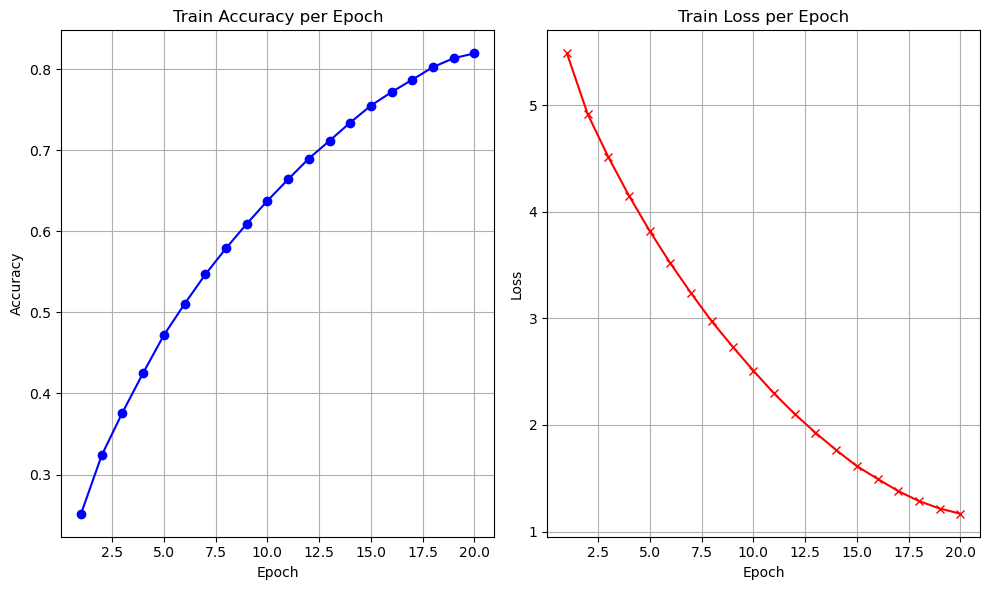

In [98]:
import matplotlib.pyplot as plt

# ✅ 학습 기록 시각화
plt.figure(figsize=(10, 6))

# 정확도 시각화
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_accuracy_history, marker='o', color='b', label="Train Accuracy")
plt.title("Train Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

# 손실 시각화
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_loss_history, marker='x', color='r', label="Train Loss")
plt.title("Train Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.tight_layout()
plt.show()

In [100]:
import torch
import torch.nn as nn
from transformers import BertModel, AutoTokenizer
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt


# ✅ 2. 감정과 상황의 클래스 수 계산
num_emotions = len(train_df["emotion"].unique())  # 감정 클래스 개수
num_situations = len(train_df["situation"].unique())  # 상황 클래스 개수

# ✅ 3. 모델 초기화
model_name = "monologg/kobert"  # KoBERT 모델명
model = KoBERTMultiOutput(model_name, num_emotions, num_situations)  # num_emotions, num_situations 정의 완료

# ✅ 4. device 설정 (GPU/CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # CUDA (GPU) 사용 가능 여부 확인
model.to(device)  # 모델을 해당 device로 이동

# 모델 체크포인트 불러오기
model.load_state_dict(torch.load("kobert_emotion_situation/best_model.pth"))
model.to(device)  # 다시 device로 모델 이동

# ✅ 5. 학습 기록 불러오기
history = torch.load("kobert_emotion_situation/history.pth", weights_only=True)
train_loss_history = history['train_loss']
train_accuracy_history = history['train_accuracy']

# ✅ 6. 테스트 데이터셋 준비 (test_dataloader)
test_texts = test_df["text"].tolist()  # 'text' 컬럼에 테스트 데이터가 있다고 가정
test_encodings = tokenizer(test_texts, padding=True, truncation=True, max_length=128, return_tensors="pt")

emotion_labels_test = emotion_encoder.transform(test_df['emotion'].values)  # 감정 라벨
situation_labels_test = situation_encoder.transform(test_df['situation'].values)  # 상황 라벨

# 텐서로 변환
emotion_labels_test = torch.tensor(emotion_labels_test)
situation_labels_test = torch.tensor(situation_labels_test)

# Test Dataset과 DataLoader 생성
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], test_encodings['token_type_ids'],
                             emotion_labels_test, situation_labels_test)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)


# ✅ 7. 모델 평가 함수 (F1-Score와 Exact Match 추가)
def evaluate_model(model, test_dataloader, loss_fn, device, emotion_encoder, situation_encoder):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    all_emotion_preds = []
    all_situation_preds = []
    all_emotion_labels = []
    all_situation_labels = []

    with torch.no_grad():
        for batch in test_dataloader:
            input_ids, attention_mask, token_type_ids, emotion_labels, situation_labels = batch
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            token_type_ids = token_type_ids.to(device)
            emotion_labels = emotion_labels.to(device)
            situation_labels = situation_labels.to(device)

            emotion_logits, situation_logits = model(input_ids, attention_mask, token_type_ids)
            loss = loss_fn(emotion_logits, emotion_labels) + loss_fn(situation_logits, situation_labels)

            total_loss += loss.item()

            emotion_pred = torch.argmax(emotion_logits, dim=1)
            situation_pred = torch.argmax(situation_logits, dim=1)

            correct += (emotion_pred == emotion_labels).sum().item()
            correct += (situation_pred == situation_labels).sum().item()
            total += emotion_labels.size(0) + situation_labels.size(0)

            all_emotion_preds.extend(emotion_pred.cpu().numpy())
            all_situation_preds.extend(situation_pred.cpu().numpy())
            all_emotion_labels.extend(emotion_labels.cpu().numpy())
            all_situation_labels.extend(situation_labels.cpu().numpy())

    avg_loss = total_loss / len(test_dataloader)
    accuracy = correct / total

    # 감정과 상황에 대해 F1-Score 계산
    emotion_f1 = f1_score(all_emotion_labels, all_emotion_preds, average='weighted')
    situation_f1 = f1_score(all_situation_labels, all_situation_preds, average='weighted')

    # Exact Match 계산 (True는 1.0, False는 0.0으로 변환)
    # 예측값을 디코딩하여 정확히 일치하는지 확인
    emotion_exact_match = (emotion_encoder.inverse_transform(all_emotion_labels) == emotion_encoder.inverse_transform(all_emotion_preds)).mean()
    situation_exact_match = (situation_encoder.inverse_transform(all_situation_labels) == situation_encoder.inverse_transform(all_situation_preds)).mean()

    # 감정 정확도, 상황 정확도 계산
    emotion_accuracy = accuracy_score(all_emotion_labels, all_emotion_preds)
    situation_accuracy = accuracy_score(all_situation_labels, all_situation_preds)

    return avg_loss, accuracy, emotion_accuracy, situation_accuracy, emotion_f1, situation_f1, emotion_exact_match, situation_exact_match



# ✅ 8. 손실 함수 정의
loss_fn = nn.CrossEntropyLoss()

# ✅ 9. 모델 평가 실행
test_loss, test_accuracy, emotion_accuracy, situation_accuracy, emotion_f1, situation_f1, emotion_exact_match, situation_exact_match = evaluate_model(
    model, test_dataloader, loss_fn, device, emotion_encoder, situation_encoder
)


# ✅ 10. 결과 출력
print(f"✅ Test Loss: {test_loss:.4f}")
print(f"✅ Test Accuracy: {test_accuracy:.4f}")
print(f"✅ Emotion Accuracy: {emotion_accuracy:.4f}")
print(f"✅ Situation Accuracy: {situation_accuracy:.4f}")
print(f"✅ Emotion F1-Score: {emotion_f1:.4f}")
print(f"✅ Situation F1-Score: {situation_f1:.4f}")
print(f"✅ Emotion Exact Match: {emotion_exact_match:.4f}")
print(f"✅ Situation Exact Match: {situation_exact_match:.4f}")


✅ Test Loss: 5.4360
✅ Test Accuracy: 0.4261
✅ Emotion Accuracy: 0.2485
✅ Situation Accuracy: 0.6036
✅ Emotion F1-Score: 0.2401
✅ Situation F1-Score: 0.6018
✅ Emotion Exact Match: 0.2485
✅ Situation Exact Match: 0.6036
